# -------------------------------------------------------------------------------------------
#
#     Get Reservoir Characteristics (from GRanD) for Western U.S. Reservoir Projects
#
# -------------------------------------------------------------------------------------------

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import cartopy.io.shapereader as shpreader
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import calendar
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import os
from os.path import isfile, join
import xarray as xr
from os import listdir
import csv


import geopandas as gpd
import geopandas

%matplotlib inline

/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [15]:
# ------------------------------------------------------------
#    Function to plot a color bar 
# ------------------------------------------------------------

# NOTE - the line doesn't s how up with a layer has a zorder > 1

def scale_bar(ax, length, utm_zone, adjx, adjy, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    """
    #Projection in metres, need to change this to suit your own figure
    utm = ccrs.UTM(utm_zone)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    #Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    sbcx = sbcx + adjx  #I added adjx to adjust left or right
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * 500, sbcx + length * 500 ] 
    #Plot the scalebar
    ax.plot(bar_xs, [sbcy, sbcy+adjy], transform=utm, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbcx, sbcy+(adjy/2), str(length) + ' km', transform=utm,
            horizontalalignment='center', verticalalignment='bottom')

# ----------------------------------------------------
#    read in data
# ----------------------------------------------------

In [17]:
# ------------------------------------------------------------
#           Upload PNW Reservoir Information
# ------------------------------------------------------------

lat_lon_pnw = pd.read_csv('/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/latlon_reservoirs.csv')
lat_lon_pnw.columns = (['site_id','lat','lon'])

In [10]:
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD/dams'
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD'
dams = geopandas.GeoDataFrame.from_file(path1)    
#grand = grand.to_crs(crs={'proj': 'latlon'})

In [11]:
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD/reservoirs'
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD'
reservoirs = geopandas.GeoDataFrame.from_file(path1)    
#grand = grand.to_crs(crs={'proj': 'latlon'})

In [12]:
dams.ix[1]

ADMIN_UNIT                                                Yukon
ALT_CITY                                                   None
ALT_HGT_M                                                   -99
ALT_LEN_M                                                   -99
ALT_NAME                                                   None
ALT_RIVER                                                  None
ALT_YEAR                                                    -99
AREA_MAX                                                    -99
AREA_MIN                                                    -99
AREA_POLY                                                  92.5
AREA_REP                                                     95
AREA_SKM                                                   92.5
CAP_MAX                                                     -99
CAP_MCM                                                   264.8
CAP_MIN                                                     -99
CAP_REP                                 

In [9]:
grand.ix[1]

ADMIN_UNIT                                                Yukon
ALT_CITY                                                   None
ALT_HGT_M                                                   -99
ALT_LEN_M                                                   -99
ALT_NAME                                                   None
ALT_RIVER                                                  None
ALT_YEAR                                                    -99
AREA_MAX                                                    -99
AREA_MIN                                                    -99
AREA_POLY                                                  92.5
AREA_REP                                                     95
AREA_SKM                                                   92.5
CAP_MAX                                                     -99
CAP_MCM                                                   264.8
CAP_MIN                                                     -99
CAP_REP                                 

In [5]:
path1 = '/raid3/rniemeyr/RBM/data/reservoirs/GRanD/dams'
grand = geopandas.GeoDataFrame.from_file(path1)    
#grand = grand.to_crs(crs={'proj': 'latlon'})

In [6]:
grand

,ADMIN_UNIT,ALT_CITY,ALT_HGT_M,ALT_LEN_M,ALT_NAME,ALT_RIVER,ALT_YEAR,AREA_MAX,AREA_MIN,AREA_POLY,...,USE_FISH,USE_IRRI,USE_LIVE,USE_NAVI,USE_OTHR,USE_PCON,USE_RECR,USE_SUPP,YEAR,geometry
0,Alaska,None,-99,-99,None,Marmont Bay,-99,-99.0,-99.0,2.1,...,None,None,None,None,None,None,None,None,1984,POINT (-153.0270833333344 57.65124999999411)
1,Yukon,None,-99,-99,None,None,-99,-99.0,-99.0,92.5,...,None,None,None,None,None,None,None,None,1952,POINT (-135.3629166666684 63.77458333332719)
2,Alaska,None,-99,-99,None,None,-99,-99.0,-99.0,4.4,...,None,None,None,None,None,None,Sec,Sec,1961,POINT (-135.1995833333351 57.06624999999413)
3,Alaska,None,-99,-99,None,None,-99,-99.0,-99.0,3.9,...,None,None,None,None,None,None,Sec,None,1982,POINT (-135.1104166666685 56.9904166666608)
4,Alaska,None,-99,-99,Snettisham Dam,None,-99,-99.0,-99.0,5.3,...,None,None,None,None,None,None,None,None,1973,POINT (-133.7287500000018 58.17041666666075)
5,British Columbia,None,-99,-99,William A.C. Bennett,None,-99,-99.0,-99.0,1623.9,...,None,None,None,None,None,None,None,None,1967,POINT (-122.1995833333356 56.02041666666084)
6,British Columbia,None,-99,-99,None,None,-99,-99.0,-99.0,8.4,...,None,None,None,None,None,None,None,None,1980,POINT (-121.9870833333356 55.99124999999417)
7,Alaska,None,-99,-99,None,Carroll Inlet,-99,-99.0,-99.0,5.1,...,None,None,None,None,None,None,None,None,1984,POINT (-131.3429166666686 55.61541666666085)
8,British Columbia,None,-99,-99,None,None,-99,-99.0,-99.0,0.6,...,None,None,None,None,None,None,None,None,1923,POINT (-129.8579166666687 55.44541666666086)
9,Alaska,None,-99,-99,None,George Inlet,-99,-99.0,-99.0,0.8,...,None,None,None,None,None,None,None,None,1968,POINT (-131.5245833333353 55.37958333332753)


/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


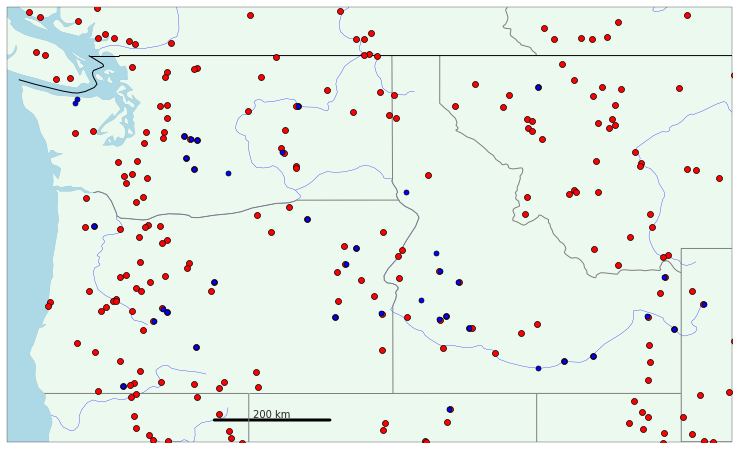

In [29]:
fig = plt.figure(figsize=(15,8))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    #ax.set_extent([-125, -109, 32, 50])  # PNW and California
    ax.set_extent([-125, -110, 41, 50])  # PNW 

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    plt.plot(dams.LONG_DD, dams.LAT_DD,'s',zorder=4, markersize=6,markeredgewidth=0.7,
             marker='o',markeredgecolor='black', color='red')
    plt.plot(lat_lon_pnw['lon'], lat_lon_pnw['lat'],'s',zorder=5, markersize=5,markeredgewidth=0.7,
         marker='o',markeredgecolor='black', color='blue')


    scale_bar(ax, 200, 10, 0, 8000) # adjx adjy
    #scale_bar(ax, 200, 10, 100000, 10000)
    
    plt.show()


if __name__ == '__main__':
    main()



/home/rniemeyr/anaconda/envs/cartopy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


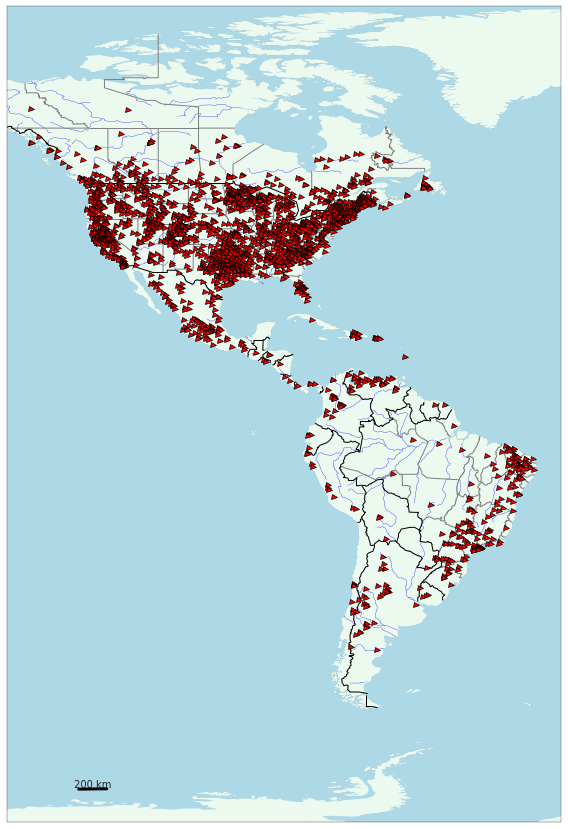

In [27]:
fig = plt.figure(figsize=(25,15))

def main():
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.set_extent([-90, -80, 34, 38]) # TVA area
    #ax.set_extent([-125, -109, 32, 50])  # PNW and California
    ax.set_extent([-140, -30, -70, 80])  # Western Hemisphere 

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    rivers_lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='50m',
        facecolor='none')
    
    country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land',
        scale='50m',
        facecolor='gray')

    ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='50m',
        facecolor='blue')
        
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(land,facecolor='#ECF9EF', zorder = 1)
    ax.add_feature(states_provinces, edgecolor='gray', zorder = 3, linewidth = 1)
    ax.add_feature(country_borders, edgecolor='black', zorder = 3, linewidth = 1)
    ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
    ax.add_feature(rivers_lakes, edgecolor='blue')
    
    plt.plot(dams.LONG_DD, dams.LAT_DD,'s',zorder=4, markersize=5,markeredgewidth=0.7,
             marker='>',markeredgecolor='black', color='red')


    scale_bar(ax, 200, 10, 0, 8000) # adjx adjy
    #scale_bar(ax, 200, 10, 100000, 10000)
    
    plt.show()


if __name__ == '__main__':
    main()

